# Task 2: CNN for Image Classification

### Import Necessary Libraries

In [80]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

### Specifiy Training and Validation Images directory

In [84]:
# Change the path if necessary
train_dir = os.path.join('./imageset/train/')
val_dir = os.path.join('./imageset/val/')

### Generate Training and Validation Images

With ImageGenerator function from TensorFlow, we can generate our training and validation images on the fly. First, the pixel value in all of the images will be rescaled. Next, the images' size will be shrinked into 75x75 to speed up the training process.

In [85]:
def image_generator(train_parent_directory, val_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    val_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 946,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    val_generator = val_datagen.flow_from_directory(val_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 392,
                                 class_mode = 'categorical')    
    
    return train_generator, val_generator

In [86]:
train_generator, val_generator = image_generator(train_dir, val_dir)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [94]:
x_train, y_train = next(train_generator)
x_test, y_test  = next(val_generator)
#labels = [np.where(i==1)[0][0] for i in example_labels]

In [95]:
n_examples = 500
example_images = x_test[0:n_examples]
example_labels = y_test[0:n_examples]
labels = [np.where(i==1)[0][0] for i in example_labels]

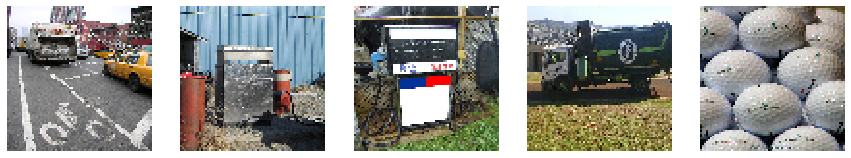

In [96]:
f, axs = plt.subplots(1, 5, figsize=(15, 4))
for j in range(len(axs)):
    axs[j].imshow(example_images[j+30], cmap='binary')
    axs[j].axis('off')

As we can see, now we have succesfully generated our training and validation images. We have 9469 of training images and 3925 of validation images.

### Building Custom CNN Model

As a first step, let's build a custom CNN model and see how it performs. The model consists of four convolutional layers with a max pooling layer in between. Next, we flatten the layer such that we have a fully-connected layer before passing it into our final layer with softmax activation function.

In [97]:
model_default = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])
model_default.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 60, 60, 8)         6152      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 28, 28, 32)        2336      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 4, 4, 64)         

In total, there are 200,626 parameters in our model.

### Train the Custom Model

Now, we can start to train our model. Since we have 10 different classes, then we need to use categorical crossentropy as our loss function. As the optimizer, we can choose any optimization algorithm, but we will go with Adam optimizer. As the metrics, we can use accuracy. In total, this model will be trained in 100 epochs.

In [14]:
model_default.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_default = model_default.fit(
      train_generator,
      validation_data = val_generator,
      steps_per_epoch=10,  
      epochs=100,
      verbose=1)

Epoch 1/100
10/10 [==============================] - 117s 12s/step - loss: 2.0879 - accuracy: 0.2938 - val_loss: 1.9952 - val_accuracy: 0.2912
Epoch 2/100
10/10 [==============================] - 113s 11s/step - loss: 1.9222 - accuracy: 0.3318 - val_loss: 1.9000 - val_accuracy: 0.3546
Epoch 3/100
10/10 [==============================] - 119s 12s/step - loss: 1.8153 - accuracy: 0.3853 - val_loss: 1.7854 - val_accuracy: 0.3832
Epoch 4/100
10/10 [==============================] - 117s 12s/step - loss: 1.7550 - accuracy: 0.3961 - val_loss: 1.7572 - val_accuracy: 0.3890
Epoch 5/100
10/10 [==============================] - 121s 12s/step - loss: 1.7626 - accuracy: 0.3906 - val_loss: 1.7336 - val_accuracy: 0.4046
Epoch 6/100
10/10 [==============================] - 115s 11s/step - loss: 1.7290 - accuracy: 0.4064 - val_loss: 1.7375 - val_accuracy: 0.4064
Epoch 7/100
10/10 [==============================] - 132s 13s/step - loss: 1.7331 - accuracy: 0.4094 - val_loss: 1.7327 - val_accuracy: 0.4104

10/10 [==============================] - 93s 9s/step - loss: 1.0986 - accuracy: 0.6276 - val_loss: 1.4221 - val_accuracy: 0.5434
Epoch 59/100
10/10 [==============================] - 98s 10s/step - loss: 1.1624 - accuracy: 0.6109 - val_loss: 1.5040 - val_accuracy: 0.5083
Epoch 60/100
10/10 [==============================] - 100s 10s/step - loss: 1.2263 - accuracy: 0.5830 - val_loss: 1.4291 - val_accuracy: 0.5197
Epoch 61/100
10/10 [==============================] - 104s 10s/step - loss: 1.1280 - accuracy: 0.6227 - val_loss: 1.3404 - val_accuracy: 0.5633
Epoch 62/100
10/10 [==============================] - 101s 10s/step - loss: 1.0468 - accuracy: 0.6438 - val_loss: 1.4020 - val_accuracy: 0.5468
Epoch 63/100
10/10 [==============================] - 97s 10s/step - loss: 1.0446 - accuracy: 0.6453 - val_loss: 1.3311 - val_accuracy: 0.5633
Epoch 64/100
10/10 [==============================] - 100s 10s/step - loss: 1.0166 - accuracy: 0.6548 - val_loss: 1.4363 - val_accuracy: 0.5294
Epoch 65/

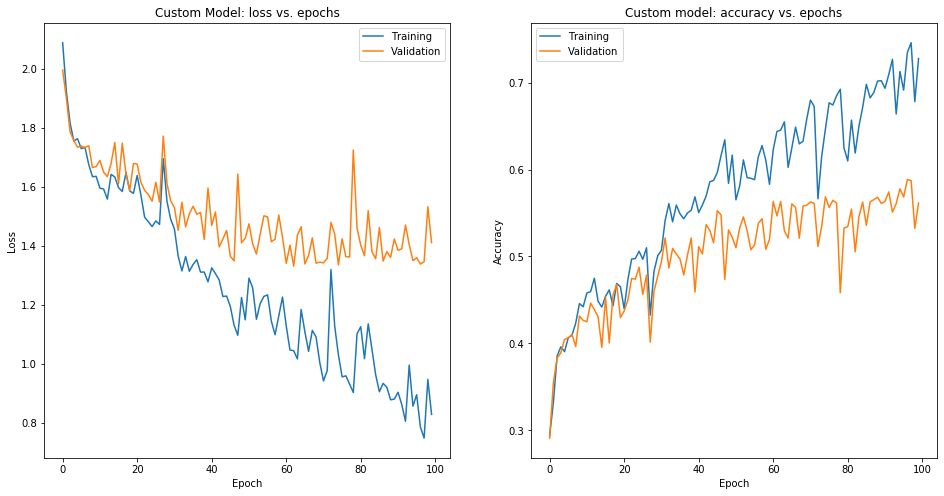

In [21]:
fig = plt.figure(figsize=(16, 8))

fig.add_subplot(121)

plt.plot(history_default.history['loss'])
plt.plot(history_default.history['val_loss'])
plt.title('Custom Model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(history_default.history['accuracy'])
plt.plot(history_default.history['val_accuracy'])
plt.title('Custom model: accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.show()

As we can see above, the custom model's performance is not good enough, as it only reaches around 70% of training accuracy and 55% validation accuracy after 100 epochs. The reason behind this is that our CNN model wasn't deep enough for it to be able to extract meaningful features from our input images, hence the low accuracy after 100 epochs. Now, let's try another way, which is utilizing transfer learning techniques.

### Transfer Learning Using InceptionV3 Model

Next, we will use transfer learning technique by utilizing InceptionV3 model trained with the weight obtained from its training on imagenet. Since this model architecture is very deep, we are going to use only until a layer called 'mixed 5' and we want to freeze the weight until this layer, i.e it's not trainable.

In [98]:
pre_trained_model = InceptionV3(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = 'imagenet')

In [99]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed5')
last_output = last_layer.output

Now at the end of 'mixed 5' layer, we want to flatten it to become a fully connected layer and pass it on until a final dense leyer with softmax activation function.

In [7]:
def model_output_for_TL (pre_trained_model, last_output):

    x = Flatten()(last_output)
    
    # Dense hidden layer
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    # Output neuron. 
    x = Dense(10, activation='softmax')(x)
    
    model = Model(pre_trained_model.input, x)
    
    return model

In [8]:
model_TL = model_output_for_TL(pre_trained_model, last_output)
model_TL.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

As we can see, there are 8,683,242 parameters in this model architecture. Much deeper than our previous custom model.

### Transfer Learning Model Training

Now that we have defined our model, we can start to train the model. The setup is the same as previous custom model.

In [ ]:
model_TL.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_TL = model_TL.fit(
      train_generator,
      validation_data = val_generator,
      steps_per_epoch=10,  
      epochs=100,
      verbose=1)

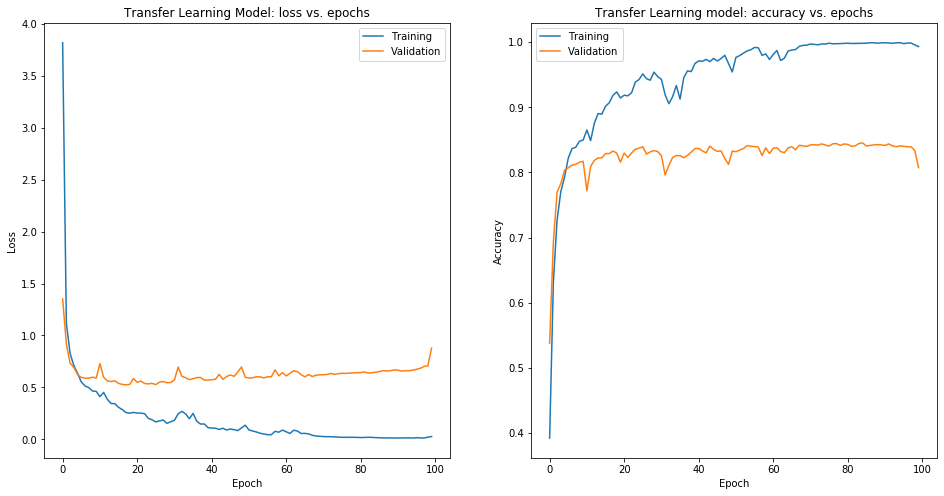

In [25]:
fig = plt.figure(figsize=(16, 8))

fig.add_subplot(121)

plt.plot(history_TL.history['loss'])
plt.plot(history_TL.history['val_loss'])
plt.title('Transfer Learning Model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(history_TL.history['accuracy'])
plt.plot(history_TL.history['val_accuracy'])
plt.title('Transfer Learning model: accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.show()

As we can see, the accuracy in both training and validation data are much more improved. We have 99% training accuracy and 83% validation accuracy. Next, we can save the model such that when we need this model again in the future, we don't need to re-train it.

In [17]:
model_TL.save("cnn_tl_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn_tl_model\assets


### Load saved transfer learning model

In [74]:
new_model_TL = load_model('cnn_tl_model')

### Prediction

Next, we can predict new images based on our trained model. First we resize the image into 75 x 75 pixels and then we can make inference based on the input image.

In [100]:
import cv2

def import_and_predict(image_data, label):
    
    #read image
    img = cv2.imread(image_data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    # resize and reshape the image
    img_resize = (cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    img_reshape = img_resize[np.newaxis,...]
    
    #predict the image
    prediction = new_model_TL.predict(img_reshape)
    
    label_prediction = label[np.argmax(prediction)]
    print('It is a ' + str(label_prediction) + ' !')


In [101]:
labels= ['fish', 'dog','radio','chainsaw','castle','saxophone','truck','fuel_tank','golf', 'parachute']

It is a fish !


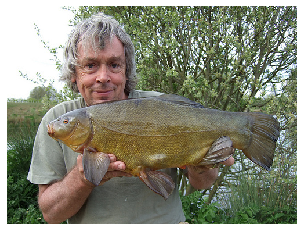

In [102]:
import_and_predict('example_img/fish.jpeg', labels)

It is a saxophone !


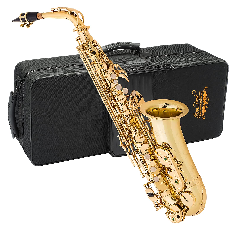

In [103]:
import_and_predict('./example_img/sax.jpg', labels)

It is a truck !


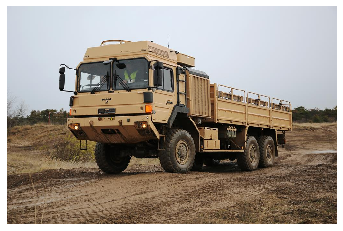

In [104]:
import_and_predict('example_img/truck.jpg', labels)